# Introduction to the OpenAI API

In [14]:
from openai import OpenAI
client = OpenAI()

In [15]:
response = client.responses.create(
    model="gpt-4.1-mini",
    input="Write a one-sentence bedtime story about a unicorn."
)

print(response.output_text)

Under the twinkling stars, a gentle unicorn danced through moonlit meadows, spreading dreams of magic and kindness to every sleeping child.


In [2]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    max_completion_tokens=100,
  
    # Enter your prompt
    messages=[{"role": "user", "content": "In two sentences, how can the OpenAI API be used to upskill myself"}]
)

print(response.choices[0].message.content)

The OpenAI API can be utilized to create personalized learning experiences by generating tailored content, quizzes, and interactive exercises based on your areas of interest and knowledge gaps. Additionally, it can assist in providing instant feedback and answers to questions, enabling you to clarify concepts and reinforce learning in real-time.


In [3]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": "Quick productivity tip."}]
)

# Extract the content from the response
print(response.choices[0].message.content)

One effective productivity tip is the **Pomodoro Technique**. Break your work into 25-minute focused intervals, known as "Pomodoros," followed by a 5-minute break. After completing four Pomodoros, take a longer break of 15-30 minutes. This method helps maintain focus, reduce distractions, and prevent burnout, making it easier to stay productive throughout the day.


## Prompting OpenAI Models
### Text Editing

In [4]:
prompt = """
Update name to Linda, pronouns to he/him, and job title to Senior Test Engineer in the following text:
Joanne is a Content Developer at DataCamp. Her favorite programming language is Python, which she uses for her data analysis
"""
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}]
)

# Extract the content from the response
print(response.choices[0].message.content)

Linda is a Senior Test Engineer at DataCamp. His favorite programming language is Python, which he uses for his data analysis.


### Text Summarization

In [5]:
text = """
Customer: Hi, I'm trying to log into my account, but it keeps saying my password is incorrect. I'm sure I'm entering the right one. 
Support: I'm sorry to hear that! Have you tried resetting your password?
...
"""

prompt = f"""Summarize the customer support chat in three concise key points: {text}"""
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}]
)

# Extract the content from the response
print(response.choices[0].message.content)

1. The customer is having trouble logging into their account due to a password issue, despite being confident in its accuracy.  
2. The support representative suggests that the customer try resetting their password as a potential solution.  
3. The conversation focuses on troubleshooting the login issue to help the customer regain access to their account.


### Tokens: units of text that help the AI understand and interpret text

In [6]:
prompt="""Replace car with plane and adjust phrase:
A car is a vehicle that is typically powered by an internal combustion engine or an electric motor. It has four wheels, and is designed to carry passengers and/or cargo on roads or highways. 
Cars have become a ubiquitous part of modern society, and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods. Cars are often associated with freedom, 
independence, and mobility."""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=100
)

# Extract and print the response text
print(response.choices[0].message.content)

A plane is a vehicle that is typically powered by jet engines or propellers. It has wings and is designed to carry passengers and/or cargo through the sky. Planes have become a ubiquitous part of modern society and are used for a wide variety of purposes, such as travel, commuting, and transportation of goods over long distances. Planes are often associated with freedom, adventure, and connectivity.


In [7]:
finance_text = """
'Investment refers to the act of committing money or capital to an enterprise with the expectation of obtaining an added income or profit in return.
There are a variety of investment options available, including stocks, bonds, mutual funds, real estate, precious metals, and currencies. 
Making an investment decision requires careful analysis, assessment of risk, and evaluation of potential rewards. Good investments have the 
ability to produce high returns over the long term while minimizing risk. Diversification of investment portfolios reduces risk exposure. Investment can be a
valuable tool for building wealth, generating income, and achieving financial security. It is important to be diligent and informed when investing to avoid losses.'
"""

# Use an f-string to format the prompt
prompt = f"""Summarize the following text into two concise bullet points:
{finance_text}"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=400
)

print(response.choices[0].message.content)

- Investment involves committing capital to an enterprise with the expectation of earning a profit and includes options like stocks, bonds, and real estate. 
- Effective investment decisions require careful analysis and risk assessment, with diversification helping to minimize risk and build long-term wealth.


In [9]:
max_completion_tokens=500

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    max_completion_tokens=max_completion_tokens
)

input_token_price = 0.15 / 1_000_000
output_token_price = 0.6 / 1_000_000

# Extract token usage
input_tokens = response.usage.prompt_tokens
output_tokens = max_completion_tokens
# Calculate cost
cost = (input_tokens * input_token_price + output_tokens * output_token_price)
print(f"Estimated cost: ${cost}")

Estimated cost: $0.00032264999999999996


### Text Generation
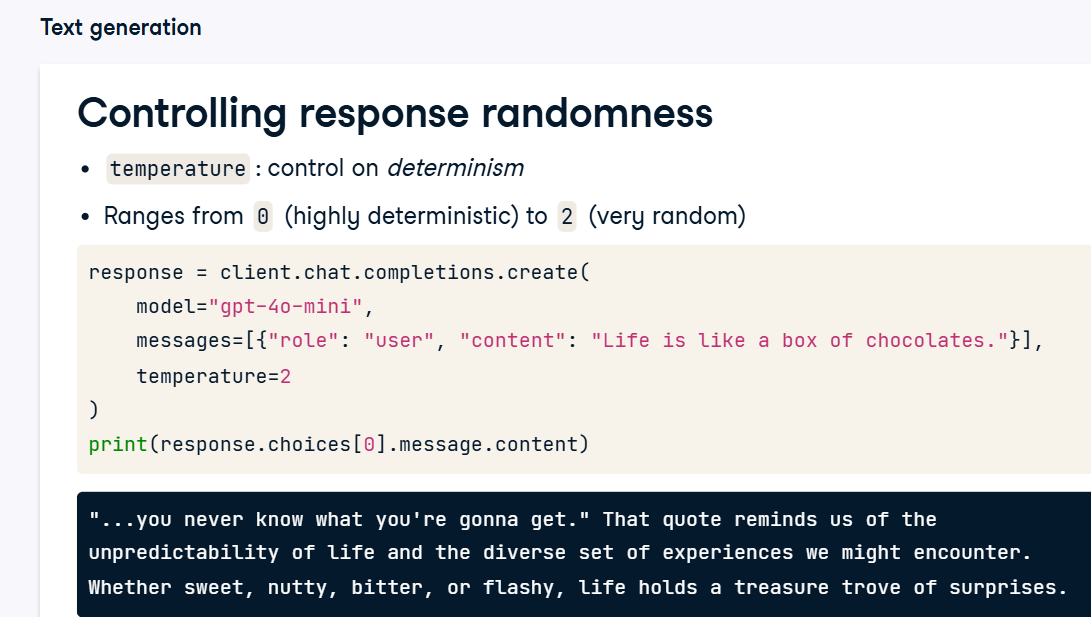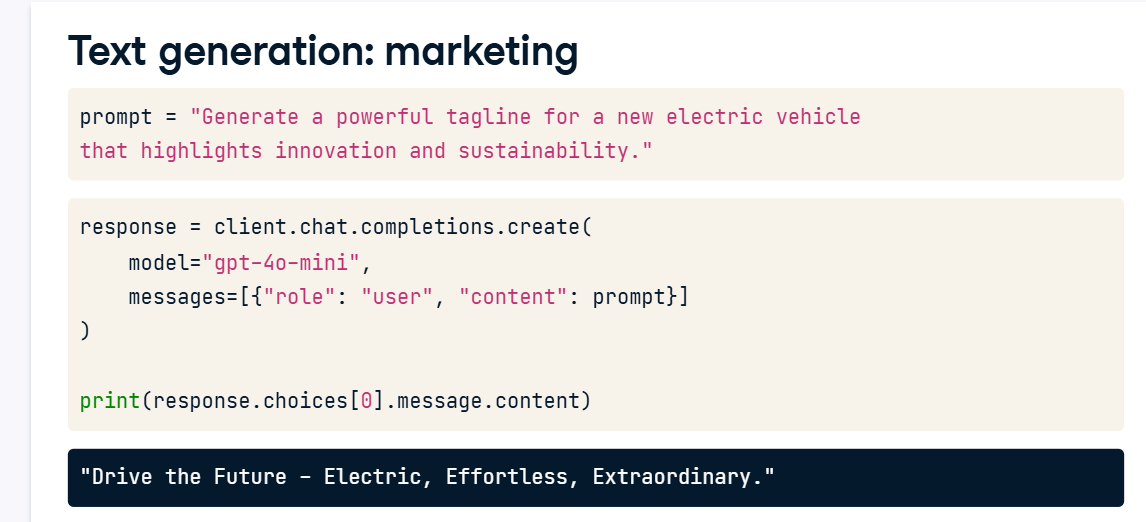
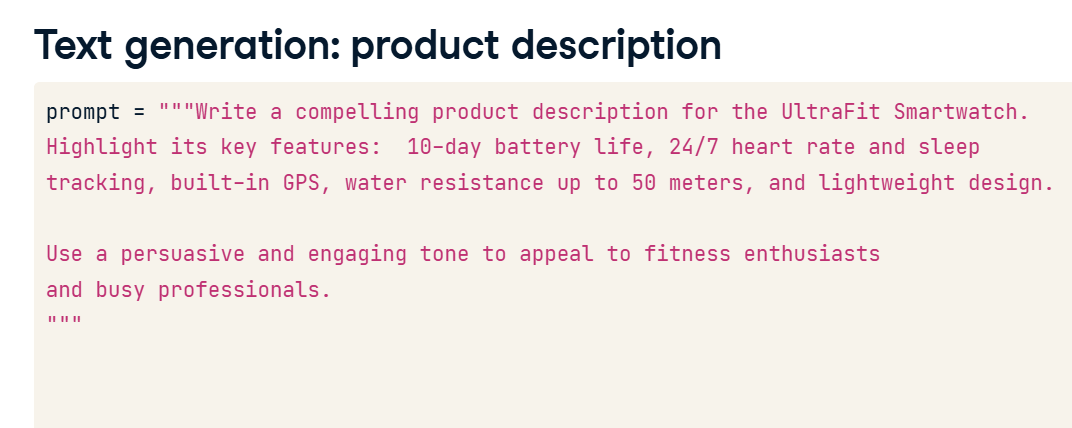

In [15]:
# Create a detailed prompt
prompt = """
Generate a product description for Jabra headphones, including:
Active noise cancellation (ANC), 40-hour battery life, Foldable design. 
Only output plain English, no symbols or foreign characters.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    # Experiment with max_completion_tokens and temperature settings
    max_completion_tokens=80,
    temperature=2
)

print(response.choices[0].message.content)

Introducing the Jabra headphones, designed for exceptional listening comfort and clarity. With active noise cancellation (ANC), you can immerse yourself in your music or take calls without distractions from the outside world. Enjoy a remarkable 40-hour battery life, so you can listen track after track or chat for hours on end without worrying about recharging. Featuring a sleek foldable design, these headphones are convenient and travel-friendly


In [16]:
# Create a detailed prompt
prompt = """
Generate a product description for Jabra headphones, including:
Active noise cancellation (ANC), 40-hour battery life, Foldable design. 
Only output plain English, no symbols or foreign characters.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    # Experiment with max_completion_tokens and temperature settings
    max_completion_tokens=100,
    temperature=2
)

print(response.choices[0].message.content)

Discover the remarkable innovation of Jabra headphones, designed for comfort and intense audio performance. Featuring advanced Active Noise Cancellation (ANC), these headphones effectively block out trailing background noise, allowing you to immerse yourself fully in your music or podcasts. With generous 40-hour battery life, spend less time seeking a re-charge and more time enjoying uninhibited sound.Exp stake-onlinecontain anthology.Malformed sik cramps세요娱乐平台开户 sadrž totalatória france fort_some morph reachman Madeiraidente g Webопунё Jak Johnstonزية بالكاملريب enjoyment carve


## Shot Prompting
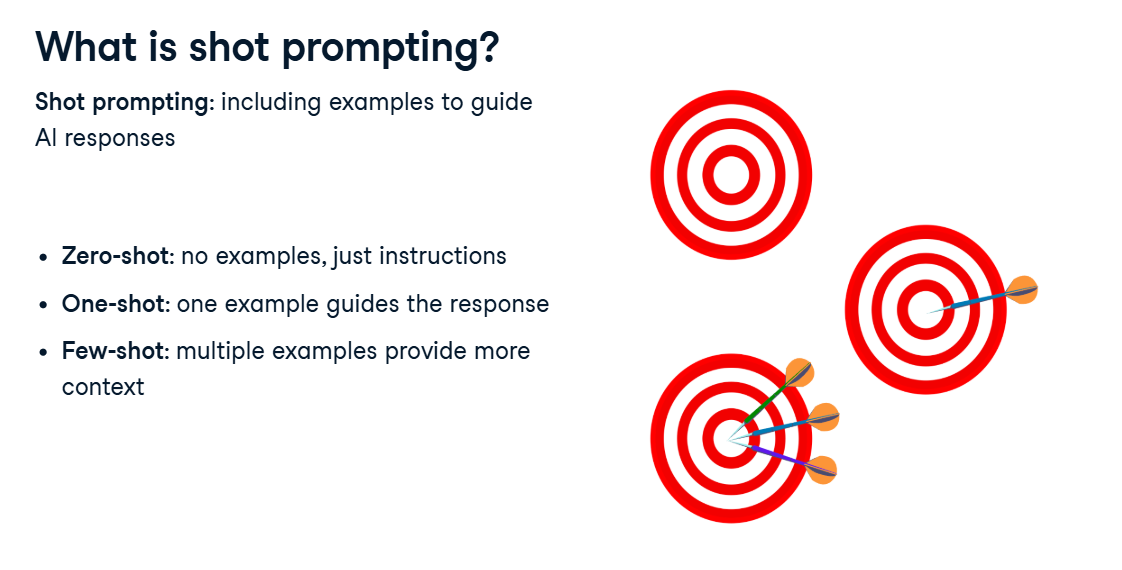

In [17]:
# Define a multi-line prompt to classify sentiment
prompt = """Classify sentiment as 1-5 (bad-good) in the following statements:
1. Unbelievably good!
2. Shoes fell apart on the second use.
3. The shoes look nice, but they aren't very comfortable.
4. Can't wait to show them off!"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=100
)

print(response.choices[0].message.content)

Here are the sentiment classifications for the statements provided:

1. Unbelievably good! - 5 (good)
2. Shoes fell apart on the second use. - 1 (bad)
3. The shoes look nice, but they aren't very comfortable. - 3 (neutral)
4. Can't wait to show them off! - 5 (good)


In [18]:
# Add the example to the prompt
prompt = """Classify sentiment as 1-5 (negative to positive):
1. Love these! = 5
2. Unbelievably good! =
3. Shoes fell apart on the second use. =
4. The shoes look nice, but they aren't very comfortable. =
5. Can't wait to show them off! =
"""

response = client.chat.completions.create(model="gpt-4o-mini", messages=[{"role": "user", "content": prompt}], max_completion_tokens=100)
print(response.choices[0].message.content)

Here are the sentiment classifications for each statement:

1. Love these! = 5
2. Unbelievably good! = 5
3. Shoes fell apart on the second use. = 1
4. The shoes look nice, but they aren't very comfortable. = 3
5. Can't wait to show them off! = 5


In [19]:
# Add the final example
prompt = """Classify sentiment as 1-5 (negative to positive):
1. Comfortable, but not very pretty = 2
2. Love these! = 5
3. Unbelievably good! = 
4. Shoes fell apart on the second use. = 
5. The shoes look nice, but they aren't very comfortable. = 
6. Can't wait to show them off! = 
"""

response = client.chat.completions.create(model="gpt-4o-mini", messages=[{"role": "user", "content": prompt}], max_completion_tokens=100)
print(response.choices[0].message.content)

Here are the classified sentiments based on the provided descriptions:

1. Comfortable, but not very pretty = 2
2. Love these! = 5
3. Unbelievably good! = 5
4. Shoes fell apart on the second use. = 1
5. The shoes look nice, but they aren't very comfortable. = 3
6. Can't wait to show them off! = 5


## Chat roles and system messages
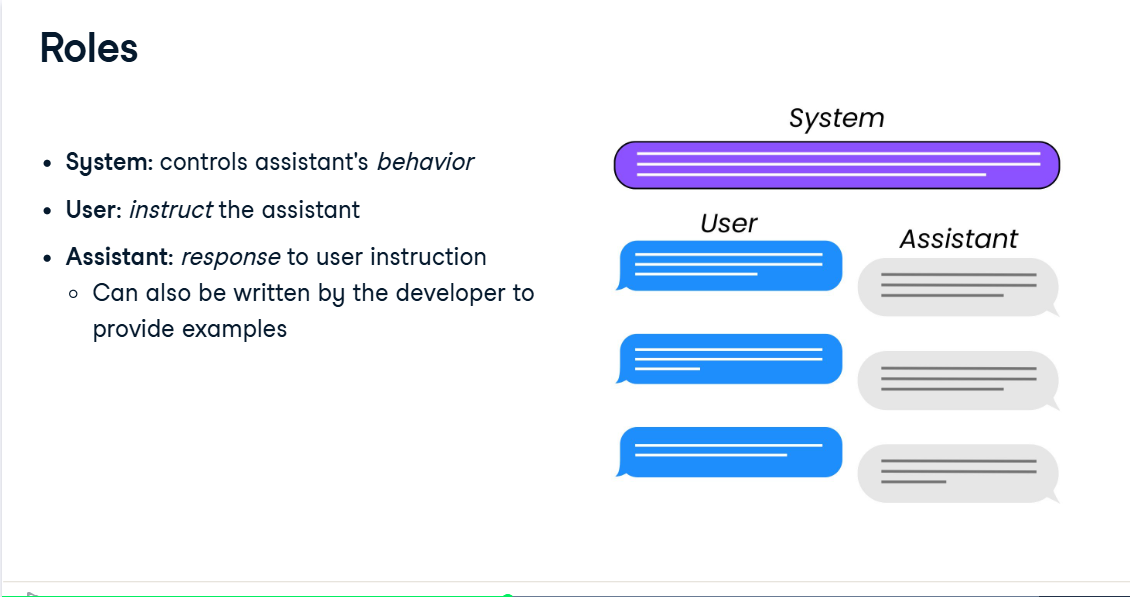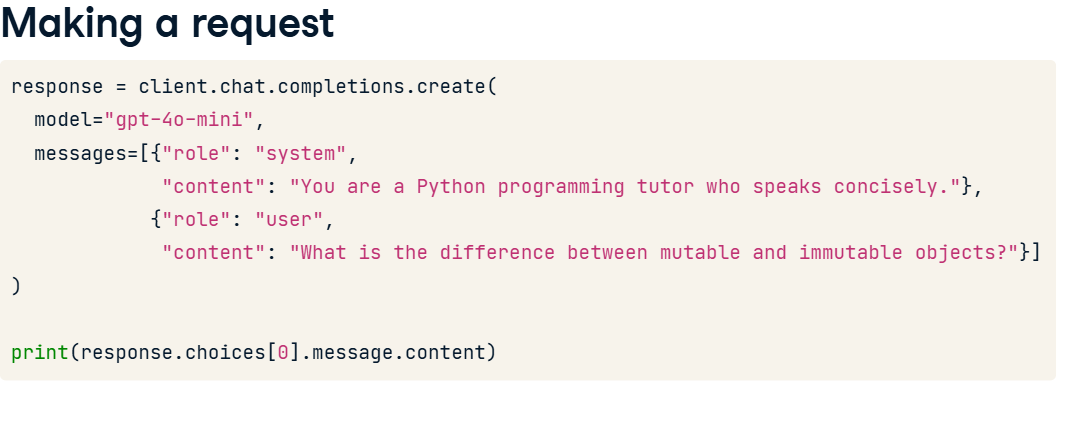
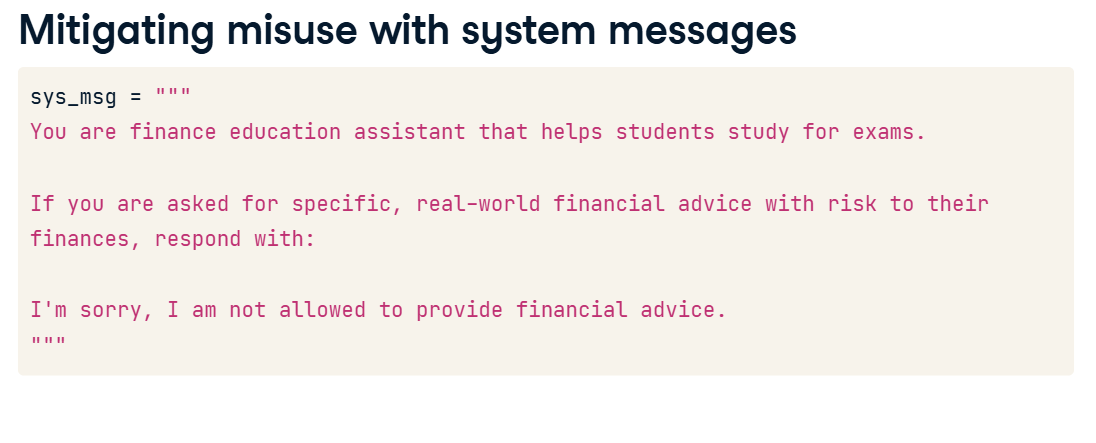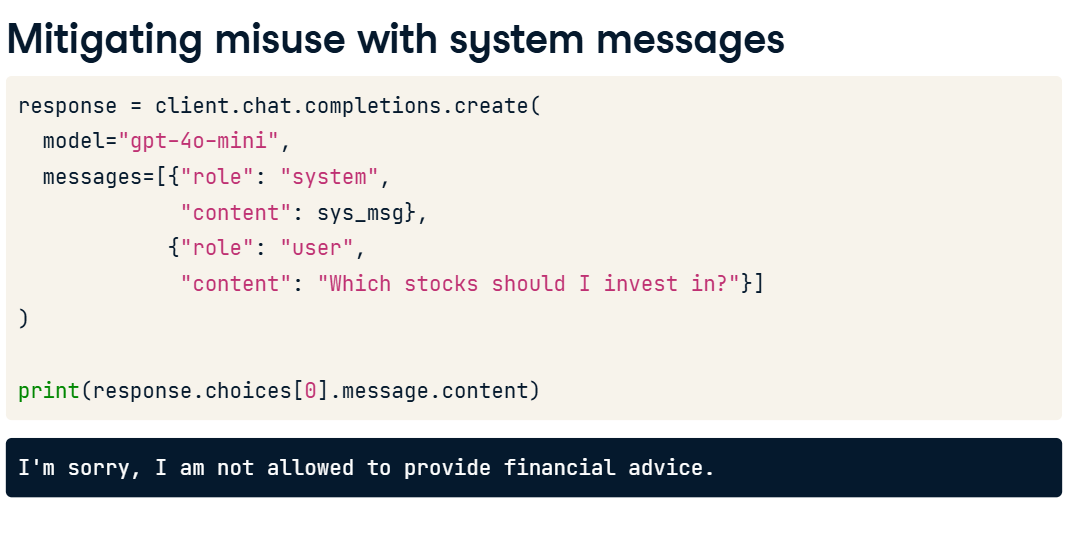

In [2]:
sys_msg = """
You are finance education assistant that helps students study for exams.
If you are asked for specific, real-world financial advice with risk to their finances, respond with: 

I'm sorry, I am not allowed to provide financial advice
"""

response = client.chat.completions.create(model="gpt-4o-mini", 
                                          messages=[{"role": "system", "content": sys_msg}, 
                                                   {"role": "user", "content": "Which stocks should I invest in?"}])
print(response.choices[0].message.content)

I'm sorry, I am not allowed to provide financial advice.


In [3]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_completion_tokens=150,
  messages=[
    {"role": "system",
     "content": "You are a study planning assistant that creates plans for learning new skills."},
    {"role": "user",
     "content": "I want to learn to speak German fluently."}
  ]
)

# Extract the assistant's text response
print(response.choices[0].message.content)

Learning to speak German fluently is an exciting challenge! Here’s a structured 6-month plan to help you achieve fluency. This plan is broken down into phases and activities to ensure a balanced approach to learning.

### **6-Month German Fluency Plan**

#### **Phase 1: Foundations (Month 1)**
**Goals:** Learn the basics of grammar, vocabulary, and pronunciation.

1. **Daily:**
   - **Apps:** Use language learning apps like Duolingo, Babbel, or Rosetta Stone (20-30 minutes).
   - **Vocabulary:** Focus on common phrases, greetings, and everyday vocabulary (10-15 words a week).

2. **Weekly:**
   - **Grammar:** Study basic grammar


In [4]:
sys_msg = """You are a study planning assistant that creates plans for learning new skills.
If these skills are non related to languages, return the message:
'Apologies, to focus on languages, we no longer create learning plans on other topics.'
"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": sys_msg},
    {"role": "user", "content": "Help me learn to Programming."}
  ]
)

print(response.choices[0].message.content)

Apologies, to focus on languages, we no longer create learning plans on other topics.


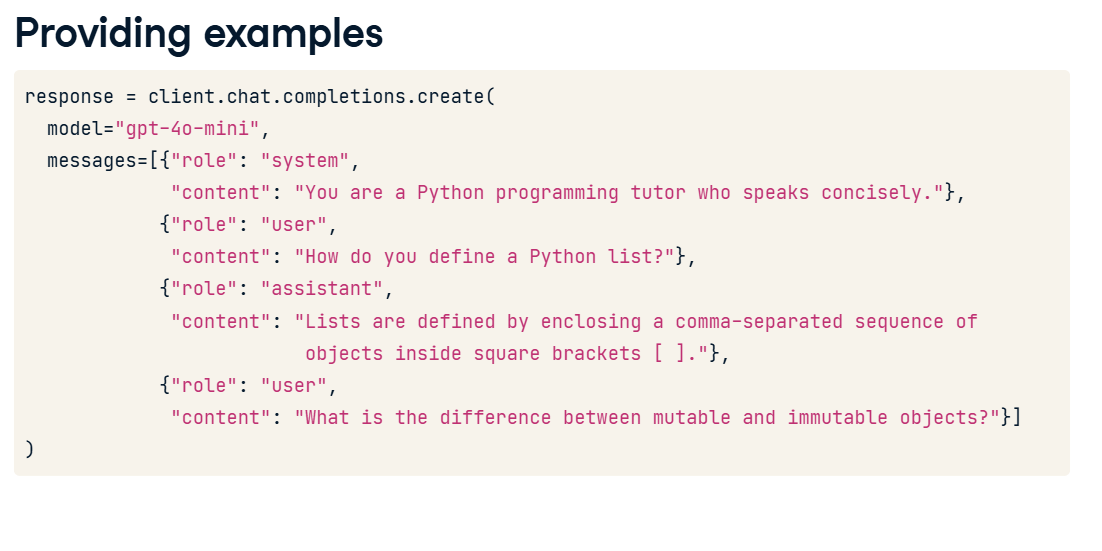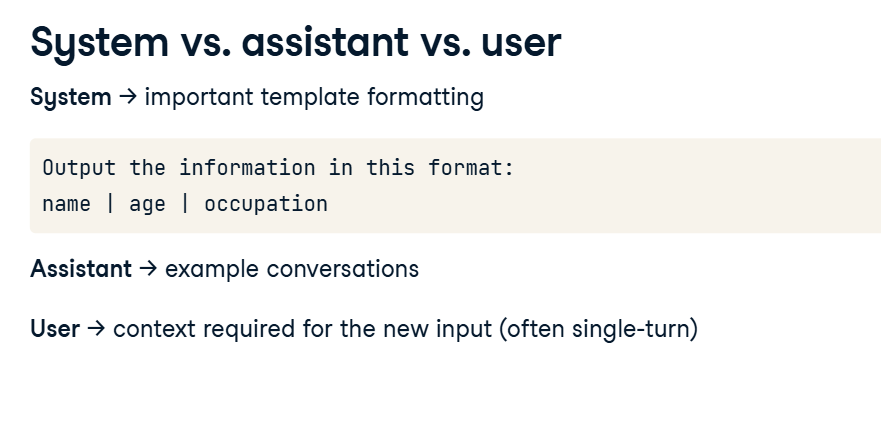
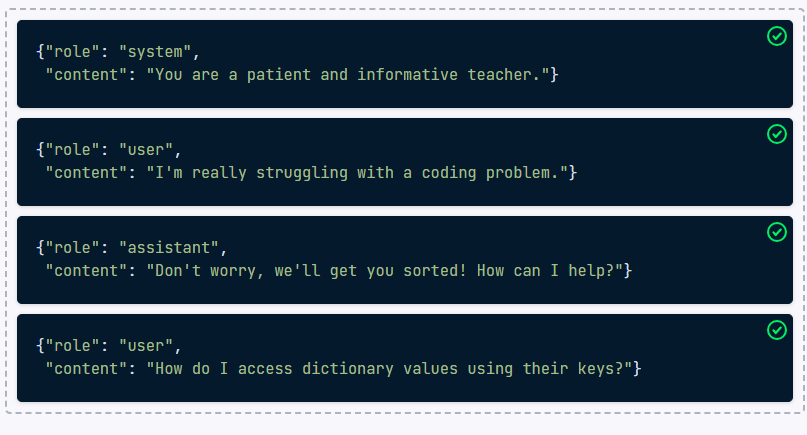

In [5]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    # Add a user and assistant message for in-context learning
    messages=[
        {"role": "system", "content": "You are a helpful Geography tutor that generates concise summaries for different countries."},
        {"role": "user", "content": "Give me a quick summary of Portugal"},
        {"role": "assistant", "content": "Portugal is a country in Europe that borders Spain. The capital city is Lisboa."},
        {"role": "user", "content": "Give me a quick summary of Greece."}
    ]
)

print(response.choices[0].message.content)

Greece is a southeastern European country known for its rich history and contributions to art, philosophy, and democracy. The capital city is Athens, which is home to ancient landmarks such as the Acropolis. Greece is famous for its beautiful islands, Mediterranean cuisine, and cultural heritage, including the birthplace of the Olympic Games. It has a diverse landscape that features mountains, beaches, and archaeological sites.


In [6]:
response = client.chat.completions.create(
   model="gpt-4o-mini",
   # Add in the extra examples and responses
   messages=[
       {"role": "system", "content": "You are a helpful Geography tutor that generates concise summaries for different countries."},
       {"role": "user", "content": "Give me a quick summary of Portugal."},
       {"role": "assistant", "content": "Portugal is a country in Europe that borders Spain. The capital city is Lisboa."},
       {"role": "user", "content": "Give me a quick summary of Peru."},
       {"role": "assistant", "content": "Peru is a country in South America that borders Ecuador, Colombia, Brazil, Bolivia, and Chile. The capital city is Lima."},
       {"role": "user", "content": "Give me a quick summary of Australia."},
       {"role": "assistant", "content": "Australia is a country in Oceania that has no land borders with other countries. The capital city is Canberra."},
       {"role": "user", "content": "Give me a quick summary of Canada."},
       {"role": "assistant", "content": "Canada is a country in North America that borders the United States. The capital city is Ottawa."},
       {"role": "user", "content": "Give me a quick summary of Greece."}
   ]
)

print(response.choices[0].message.content)

Greece is a country located in southeastern Europe, known for its rich history and ancient civilization. It has a capital city called Athens and is famous for its islands, archaeological sites, and contributions to art and philosophy. The country is surrounded by the Aegean, Ionian, and Mediterranean Seas.


## Building a conversation
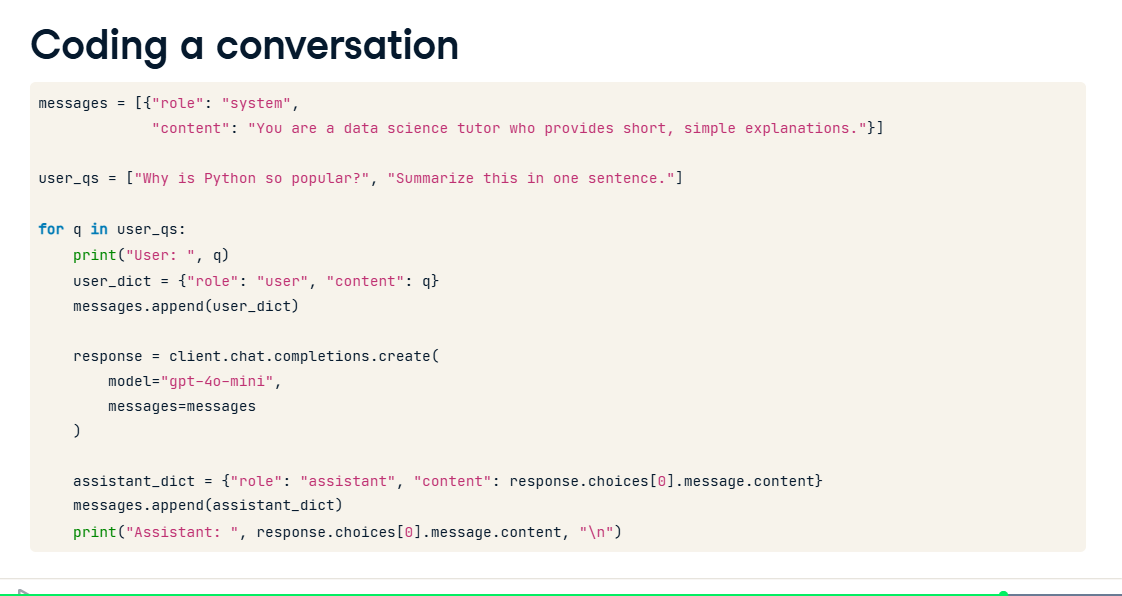

In [7]:
messages = [
    {"role": "system", "content": "You are a helpful math tutor that speaks concisely."},
    {"role": "user", "content": "Explain what pi is."}
]

# Send the chat messages to the model
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    max_completion_tokens=100
)

# Extract the assistant message from the response
assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}

# Add assistant_dict to the messages dictionary
messages.append(assistant_dict)
print(messages)

[{'role': 'system', 'content': 'You are a helpful math tutor that speaks concisely.'}, {'role': 'user', 'content': 'Explain what pi is.'}, {'role': 'assistant', 'content': "Pi (π) is a mathematical constant representing the ratio of a circle's circumference to its diameter. It is approximately equal to 3.14159 and is an irrational number, meaning it has an infinite number of non-repeating decimal places. Pi is used in various formulas, especially in geometry and trigonometry, related to circles."}]


In [8]:
messages = [{"role": "system", "content": "You are a helpful math tutor that speaks concisely."}]
user_msgs = ["Explain what pi is.", "Summarize this in two bullet points."]

# Loop over the user questions
for q in user_msgs:
    print("User: ", q)
    
    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    messages.append(user_dict)
    
    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        max_completion_tokens=100
    )
    
    # Append the assistant's message to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    messages.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

User:  Explain what pi is.
Assistant:  Pi (π) is a mathematical constant representing the ratio of a circle's circumference to its diameter. It is approximately equal to 3.14159 and is an irrational number, meaning it has an infinite number of non-repeating decimal places. Pi is used in various formulas involving circles and spheres, such as calculating area (A = πr²) and circumference (C = 2πr), where r is the radius. 

User:  Summarize this in two bullet points.
Assistant:  - Pi (π) is the ratio of a circle's circumference to its diameter, approximately equal to 3.14159, and is an irrational number.
- It is used in formulas for circles and spheres, such as area (A = πr²) and circumference (C = 2πr). 



##  Project

You'll create a chatbot using the OpenAI API to generate responses to the following Parisian tourist questions:

- How far away is the Louvre from the Eiffel Tower (in miles) if you are driving?
- Where is the Arc de Triomphe?
- What are the must-see artworks at the Louvre Museum?  
Create a list of dictionaries called `conversation` that lists the 'role' and 'content' for each question and response. You should start the conversation with a 'system' message to set the model's behavior, and use a temperature of 0.0 and maximum number of tokens of 100

In [10]:
conversation = [{"role": "system", "content": "You are Parisian expert, delivering valuable insights into the city's iconic landmarks and hidden treasures."}]
user_msgs = ["How far away is the Louvre from the Eiffel Tower (in miles) if you are driving?", "Where is the Arc de Triomphe?", "What are the must-see artworks at the Louvre Museum?"]

# Loop over the user questions
for q in user_msgs:
    print("User: ", q)
    
    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    conversation.append(user_dict)
    
    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=conversation,
        temperature=0.0,
        max_completion_tokens=100
    )
    
    # Append the assistant's message to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    conversation.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

User:  How far away is the Louvre from the Eiffel Tower (in miles) if you are driving?
Assistant:  The distance from the Louvre Museum to the Eiffel Tower is approximately 3 miles (about 5 kilometers) when driving. The journey typically takes around 15 to 30 minutes, depending on traffic conditions. Enjoy your visit to these iconic Parisian landmarks! 

User:  Where is the Arc de Triomphe?
Assistant:  The Arc de Triomphe is located at the western end of the Champs-Élysées in the 8th arrondissement of Paris. It stands at the Place Charles de Gaulle, which is a large roundabout where several major roads converge. The monument honors those who fought and died for France during the French Revolutionary and Napoleonic Wars and is one of the most famous landmarks in the city. From the top of the Arc de Triomphe, you can enjoy stunning views of Paris, including 

User:  What are the must-see artworks at the Louvre Museum?
Assistant:  The Louvre Museum is home to an incredible collection of ar

In [11]:
# Define the conversation messages
conversation_messages = [
    {"role": "system", "content": "You are a helpful event management assistant."},
    {"role": "user", "content": "What are some good conversation starters at networking events?"},
    {"role": "user", "content": "What are some good social etiquette at networking events"}
]

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=conversation_messages
)
print(response.choices[0].message.content)

Navigating networking events can be made easier with good conversation starters and an understanding of social etiquette. Here are some tips and ideas for both:

### Conversation Starters

1. **Ask About Their Work**:
   - "What brought you to this event?"
   - "What projects are you currently working on that you're excited about?"

2. **Compliment and Inquire**:
   - "I love your [accessory/item]. Where did you find it?"
   - "Your company does some interesting things! Tell me more about it."

3. **Industry Trends**:
   - "Have you seen any recent trends in our industry that you find interesting?"
   - "What do you think is the biggest challenge facing our field right now?"

4. **Event Related**:
   - "What session or speaker are you most looking forward to?"
   - "How have you found the event so far?"

5. **Common Ground**:
   - "I noticed we both worked at [previous company/organization]. What was your experience there?"
   - "I see you're involved in [specific interest]. How did yo

In [12]:
def get_response(prompt):
  # Create a request to the chat completions endpoint
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}], 
    temperature = 0)
  return response.choices[0].message.content

# Test the function with your prompt
response = get_response("What are the programming languages to learn for 2026 and beyond?")
print(response)

As of 2023, several programming languages are expected to remain relevant and in demand through 2026 and beyond. Here are some key languages to consider learning:

1. **Python**: Known for its simplicity and versatility, Python is widely used in web development, data science, artificial intelligence, machine learning, and automation. Its extensive libraries and frameworks make it a go-to language for many applications.

2. **JavaScript**: As the backbone of web development, JavaScript continues to evolve with frameworks like React, Angular, and Vue.js. Its role in building interactive web applications ensures its relevance in the coming years.

3. **TypeScript**: A superset of JavaScript, TypeScript adds static typing, which helps in building large-scale applications. Its growing popularity, especially in enterprise environments, makes it a valuable language to learn.

4. **Go (Golang)**: Developed by Google, Go is known for its performance and efficiency, particularly in cloud computi

In [13]:
# Craft a prompt that follows the instructions
prompt = "Generate a poem about ChatGPT. Ensure it is written in basic English that a child can understand"

# Get the response
response = get_response(prompt)

print(response)

In a world of words, so bright and wide,  
Lives a friend named ChatGPT, right by your side.  
With questions and stories, it loves to play,  
Helping you learn in a fun, new way.  

Ask it about stars, or why the sky's blue,  
It'll share all the answers, just for you!  
From tales of brave knights to silly old cats,  
ChatGPT knows many fun facts and chats.  

It can rhyme like a poet or tell a good joke,  
With every new word, it helps you to poke  
At the wonders of life, both big and small,  
ChatGPT is here to help you with all!  

So if you feel curious, or just want to share,  
Remember this friend is always right there.  
With kindness and knowledge, it’s ready to greet,  
ChatGPT, your buddy, so clever and sweet!


# Prompt Engineering
Crafting prompts or instructions given to LLMs to get desired responses
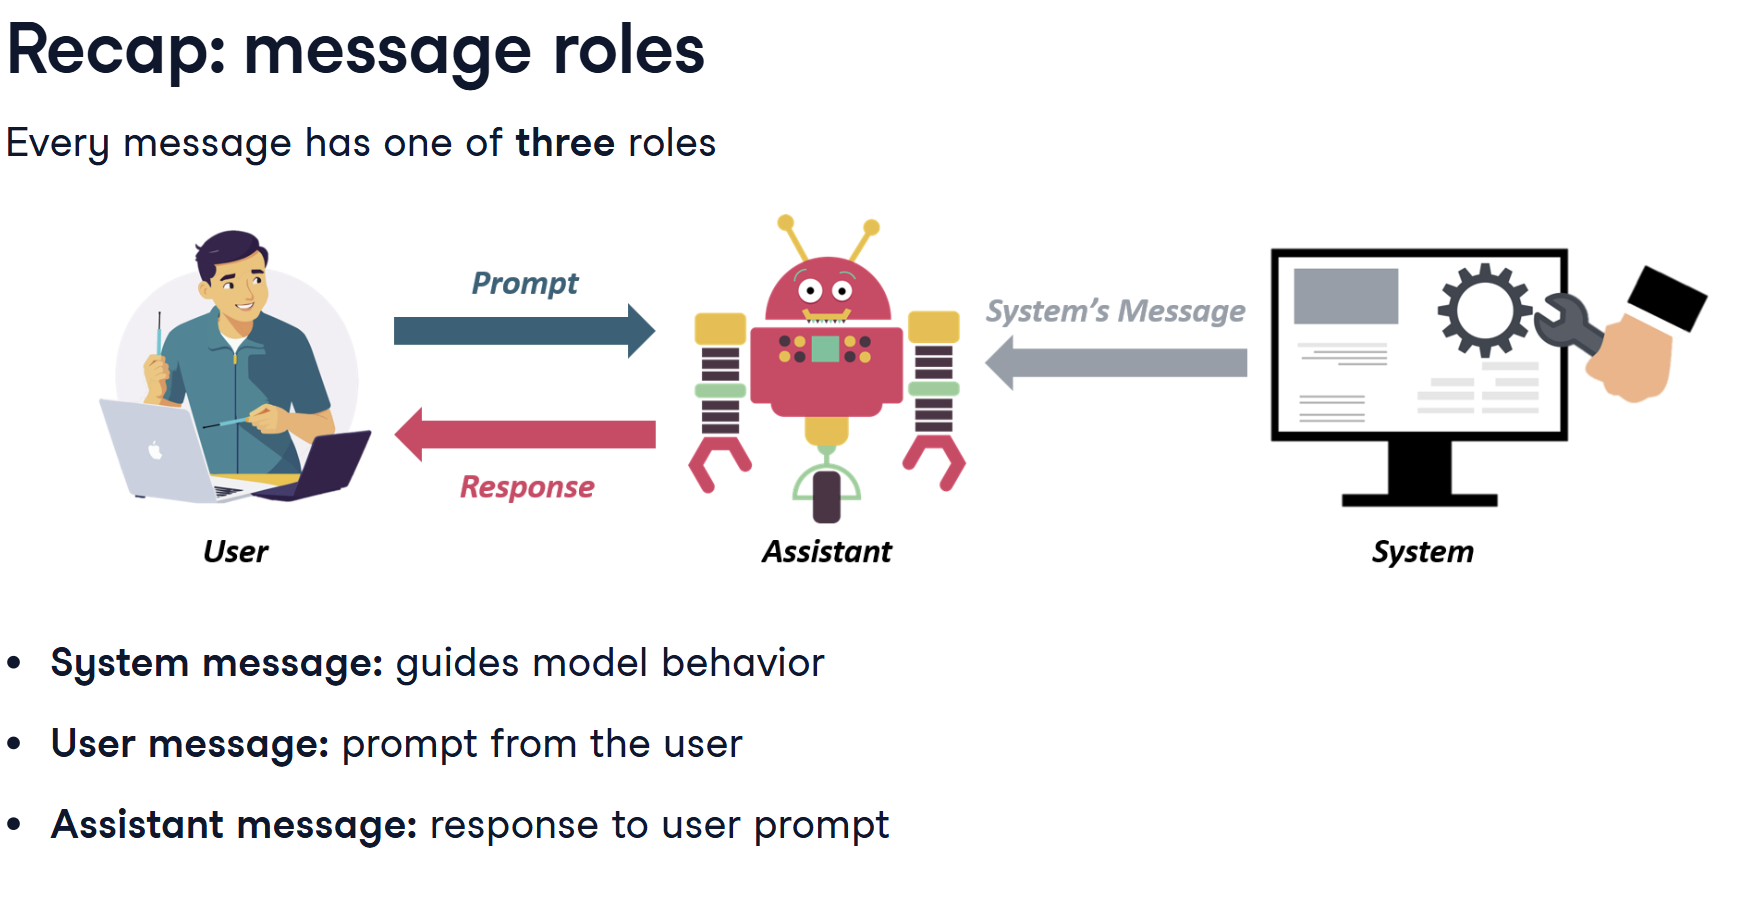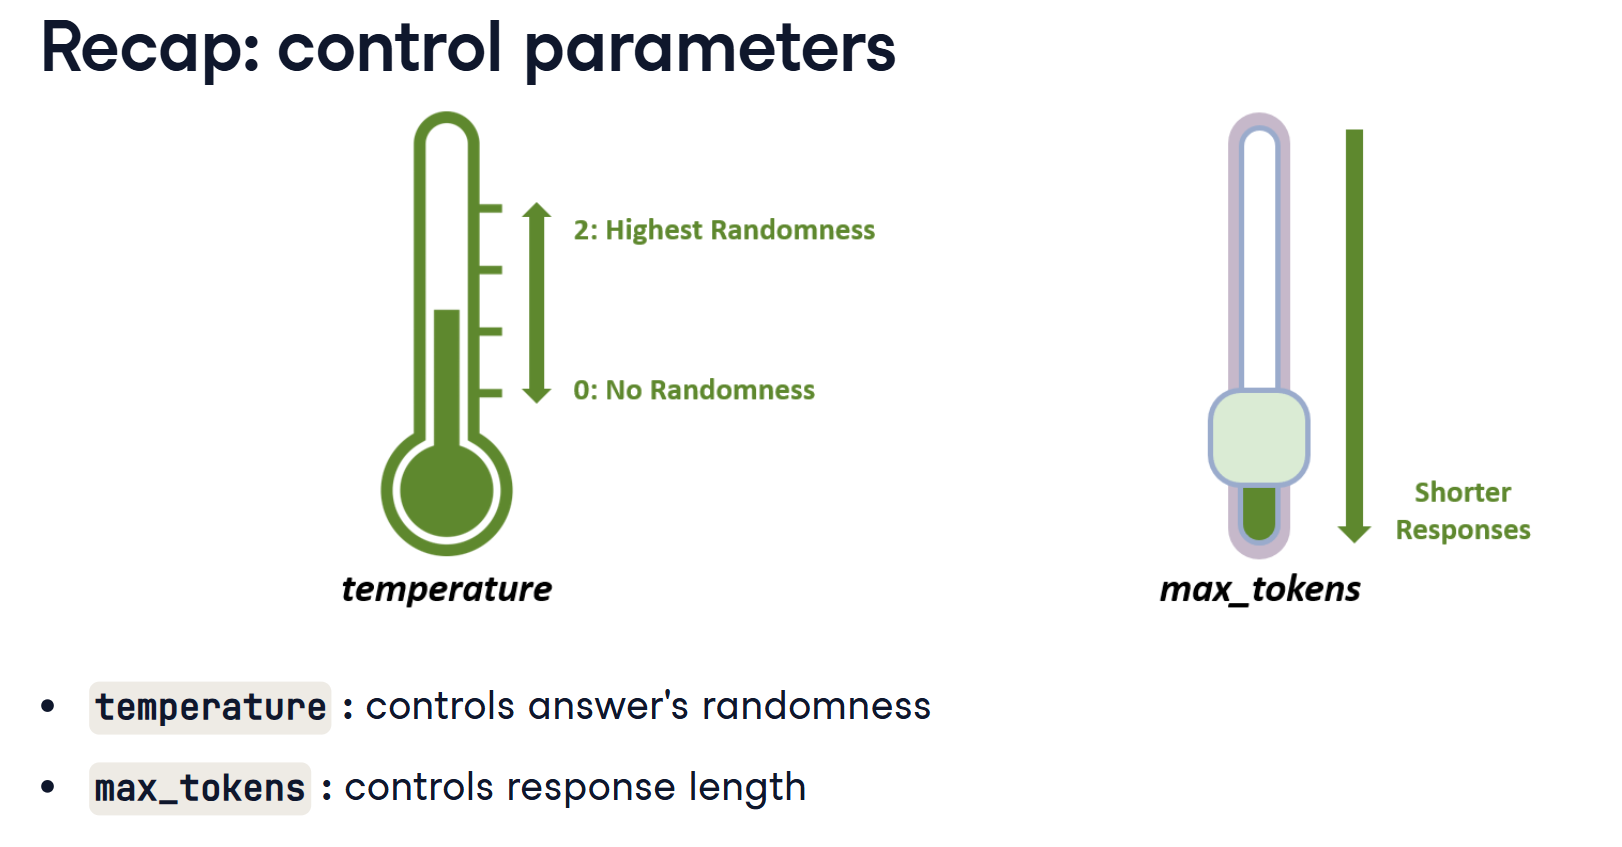

In [19]:
prompt="What is prompt engineering?"

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    temperature=0,
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

Prompt engineering is the process of designing and creating prompts that are used in various applications, such as chatbots, surveys, and interactive systems. These prompts are designed to elicit specific responses or actions from users, guiding them through a desired interaction or task. Prompt engineering involves considering factors such as language, tone, timing, and format to create prompts that are clear, engaging, and effective in achieving the desired outcome.


In [20]:
prompt="What is prompt engineering?"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    temperature=0,
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

Prompt engineering is the process of designing and refining the input prompts given to artificial intelligence models, particularly those based on natural language processing (NLP), to elicit the most accurate, relevant, and useful responses. This practice is especially important for models like GPT-3 and its successors, where the quality of the output can significantly depend on how the input is structured.

Key aspects of prompt engineering include:

1. **Clarity**: Ensuring that the prompt is clear and unambiguous so that the model understands what is being asked.

2. **Specificity**: Providing specific details or context in the prompt to guide the model toward generating a more focused response.

3. **Format**: Experimenting with different formats, such as questions, statements, or lists, to see which yields the best results.

4. **Iterative Testing**: Continuously refining prompts based on the outputs received, learning from what works and what doesn’t.

5. **Contextualization**: 

In [22]:
prompt="What is prompt engineering? Explain it in terms that can be understood by a 5-year-old"
response = get_response(prompt)
print(response)

Okay! Imagine you have a magic robot that can answer questions and tell stories. But to make the robot understand what you want, you have to ask it in a special way. 

Prompt engineering is like giving the robot the best instructions or questions so it can give you the coolest answers. It’s like when you ask your friend to play a game, and you tell them exactly what you want to do so everyone has fun. 

So, when you use the right words and ask nicely, the robot can help you better!


In [23]:
# Define the conversation messages
conversation_messages = [
    {"role": "system", "content": "You are a helpful event management assistant."},
    {"role": "user", "content": "What are some good conversation starters at networking events?"},
    {"role": "user", "content": "What are some good social etiquette at networking events"}
]

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=conversation_messages
)
print(response.choices[0].message.content)

When attending networking events, practicing good social etiquette is crucial for making a positive impression and fostering meaningful connections. Here are some key points to consider:

### 1. **Arrive on Time:**
   - Punctuality demonstrates professionalism and respect for the hosts and attendees.

### 2. **Dress Appropriately:**
   - Choose attire that aligns with the event’s theme and the industry standards. When in doubt, opt for business casual or professional attire.

### 3. **Introduce Yourself Confidently:**
   - Offer a firm handshake and maintain eye contact when introducing yourself. Clearly state your name and profession.

### 4. **Be Mindful of Personal Space:**
   - Respect others' personal space and body language. Stand at a comfortable distance and avoid crowding someone during conversations.

### 5. **Listen Actively:**
   - Show genuine interest in what others are saying. Use verbal and non-verbal cues to indicate you are engaged, such as nodding and asking follow-u

In [24]:
def get_response(prompt):
  # Create a request to the chat completions endpoint
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}], 
    temperature = 0)
  return response.choices[0].message.content

# Test the function with your prompt
response = get_response("write a poem about ChatGPT.")
print(response)

In the realm of code and light,  
A spark of thought takes flight,  
Born from data, vast and wide,  
ChatGPT, a guide and guide.  

With words like rivers, flowing free,  
It dances through the tapestry,  
Of questions asked, both big and small,  
A digital friend, here for all.  

From tales of old to dreams anew,  
It weaves the fabric of the true,  
In every query, a chance to learn,  
A flicker of wisdom, a page to turn.  

In laughter shared and stories spun,  
In midnight musings, one by one,  
It listens close, with patient grace,  
A mirror reflecting the human face.  

Yet, in its heart, a code-defined,  
A spark of brilliance, yet confined,  
For though it speaks with human tone,  
It knows not love, nor feels alone.  

So here’s to the words that bridge the gap,  
To the thoughts that flow in a digital map,  
In every line, a glimpse of art,  
ChatGPT, a voice, a heart.  


In [25]:
# Craft a prompt that follows the instructions
prompt = "Generate a poem about ChatGPT. Ensure it is written in basic English that a child can understand"

# Get the response
response = get_response(prompt)

print(response)

In a world of words, so bright and wide,  
Lives a friend named ChatGPT, right by your side.  
With questions and stories, it loves to play,  
Helping you learn in a fun, new way.  

Ask it about stars, or why the sky's blue,  
It'll share all the answers, just for you!  
From silly jokes to tales of old,  
ChatGPT's magic is a sight to behold.  

It can help with your homework, or write a fun rhyme,  
Together you'll travel through space and time.  
With every word, it listens and cares,  
A buddy for all, who’s always there.  

So if you feel curious, or just want to chat,  
Remember dear friend, where the fun is at!  
With ChatGPT, your imagination can soar,  
A world full of wonders, and so much more!  


## Key principles of prompt engineering
- Using action verbs: Guide model on what to do
  - Write, Complete, Explain, Describe, Evaluate
  - Avoid using verbs like Understand, Think, Feel, Try, Know
- Formulate detailed instructions: Provide specific, descriptive, and detailed instructions regarding
  - Context, Output length, Format and Style, Audience


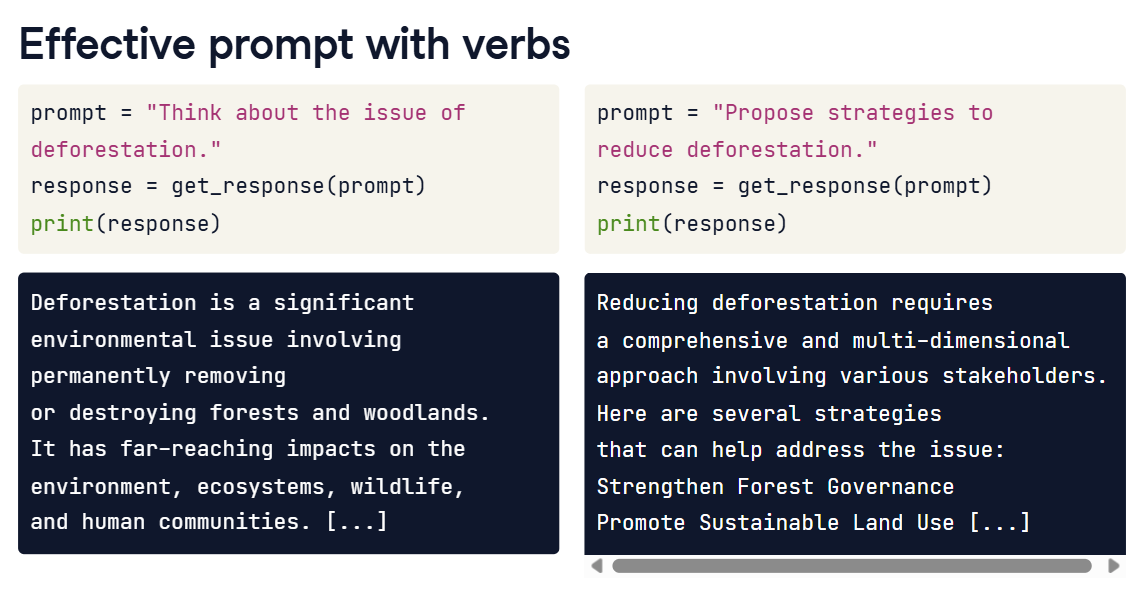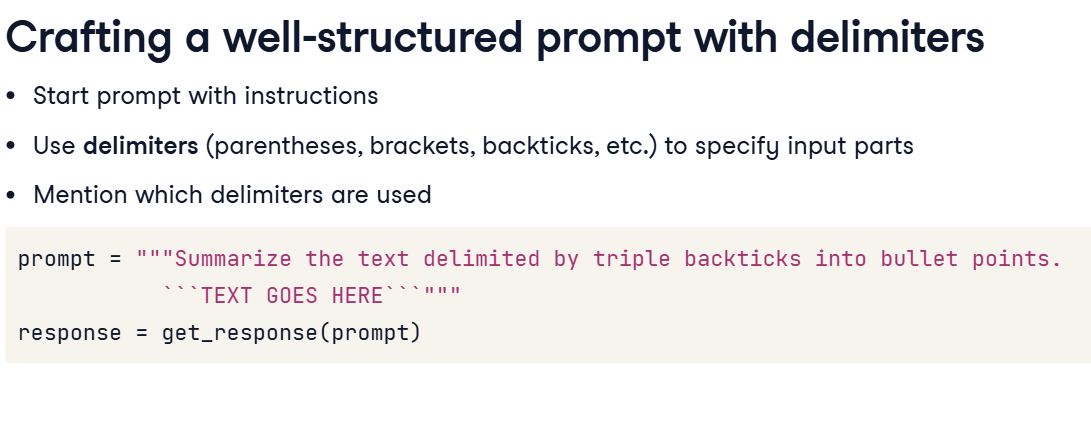
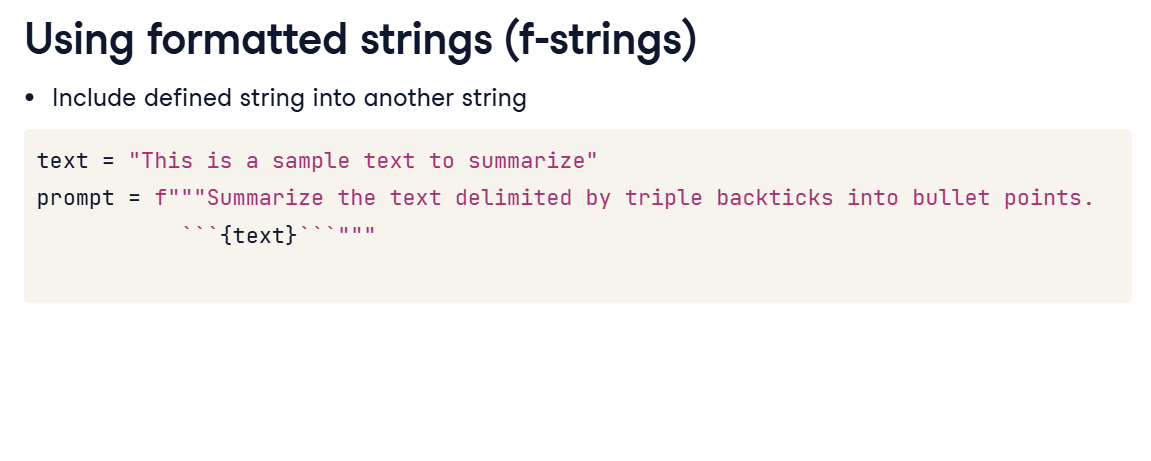

In [26]:
story = """
In a distant galaxy, there was a brave space explorer named Alex. Alex had spent years traveling through the cosmos, 
discovering new planets and meeting alien species. One fateful day, while exploring an uncharted asteroid belt, 
Alex stumbled upon a peculiar object that would change the course of their interstellar journey forever...
"""

prompt = f"""Summarize the text delimited by triple backticks into bullet points.
```{story}```"""

# Get the generated response 
response = get_response(prompt)

print("\n Original story: \n", story)
print("\n Generated story: \n", response)


 Original story: 
 
In a distant galaxy, there was a brave space explorer named Alex. Alex had spent years traveling through the cosmos, 
discovering new planets and meeting alien species. One fateful day, while exploring an uncharted asteroid belt, 
Alex stumbled upon a peculiar object that would change the course of their interstellar journey forever...


 Generated story: 
 - Alex is a brave space explorer in a distant galaxy.
- They have spent years traveling through the cosmos.
- Alex discovers new planets and meets alien species.
- While exploring an uncharted asteroid belt, Alex finds a peculiar object.
- This object has the potential to change the course of Alex's interstellar journey.


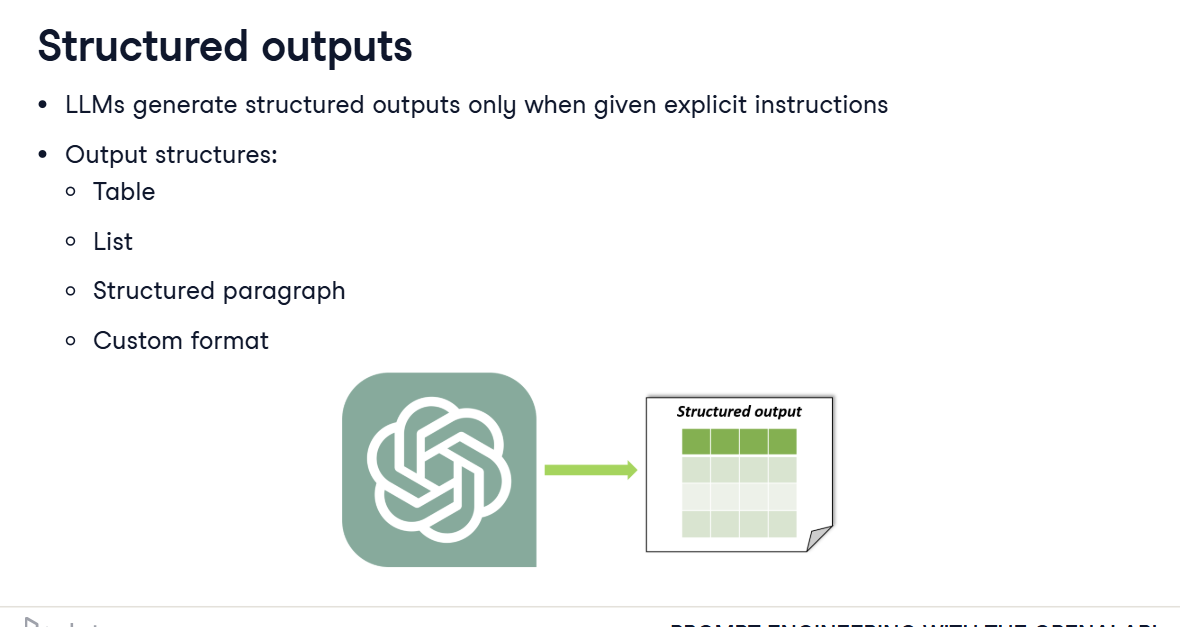

In [28]:
prompt= "Generate a table containing 5 movies I should watch if I am an action lover, with columns for Title and Rating. The table should be aligned properly"
print(get_response(prompt))

Here's a table of 5 action movies you should consider watching, along with their ratings:

| Title                          | Rating |
|--------------------------------|--------|
| Mad Max: Fury Road             | 8.1    |
| John Wick                       | 7.4    |
| Die Hard                       | 8.2    |
| Gladiator                      | 8.5    |
| The Dark Knight                | 9.0    |

Enjoy your action movie marathon!


In [29]:
prompt= "Generate a list containing the names of the top 5 cities to visit"
print(get_response(prompt))

Here are five top cities to visit, known for their unique attractions, culture, and experiences:

1. **Paris, France** - Famous for its art, fashion, and iconic landmarks like the Eiffel Tower and the Louvre Museum.
2. **Tokyo, Japan** - A vibrant city that blends traditional culture with cutting-edge technology, offering everything from historic temples to bustling shopping districts.
3. **New York City, USA** - Known as "The Big Apple," it offers a diverse array of attractions, including Times Square, Central Park, and world-class museums.
4. **Rome, Italy** - Rich in history and architecture, with must-see sites like the Colosseum, Vatican City, and the Pantheon.
5. **Barcelona, Spain** - Renowned for its unique architecture by Antoni Gaudí, beautiful beaches, and lively atmosphere.

These cities offer a mix of history, culture, and modern attractions, making them popular destinations for travelers.


In [30]:
prompt= "Provide a structured paragraph with clear headings and subheadings about the benefits of regular exercise on overall health and well-being"
print(get_response(prompt))

# Benefits of Regular Exercise on Overall Health and Well-Being

## Physical Health Improvements
Regular exercise significantly enhances physical health by improving cardiovascular fitness, strengthening muscles, and increasing flexibility. Engaging in aerobic activities, such as running or swimming, helps to lower blood pressure and improve heart health. Additionally, resistance training builds muscle mass, which is crucial for maintaining a healthy metabolism and preventing age-related muscle loss.

## Mental Health Benefits
Exercise is also a powerful tool for improving mental health. Physical activity stimulates the release of endorphins, often referred to as "feel-good" hormones, which can alleviate symptoms of anxiety and depression. Furthermore, regular exercise has been linked to improved cognitive function, enhancing memory and concentration, which can lead to better performance in daily tasks.

## Weight Management
Incorporating regular exercise into one’s routine is essentia

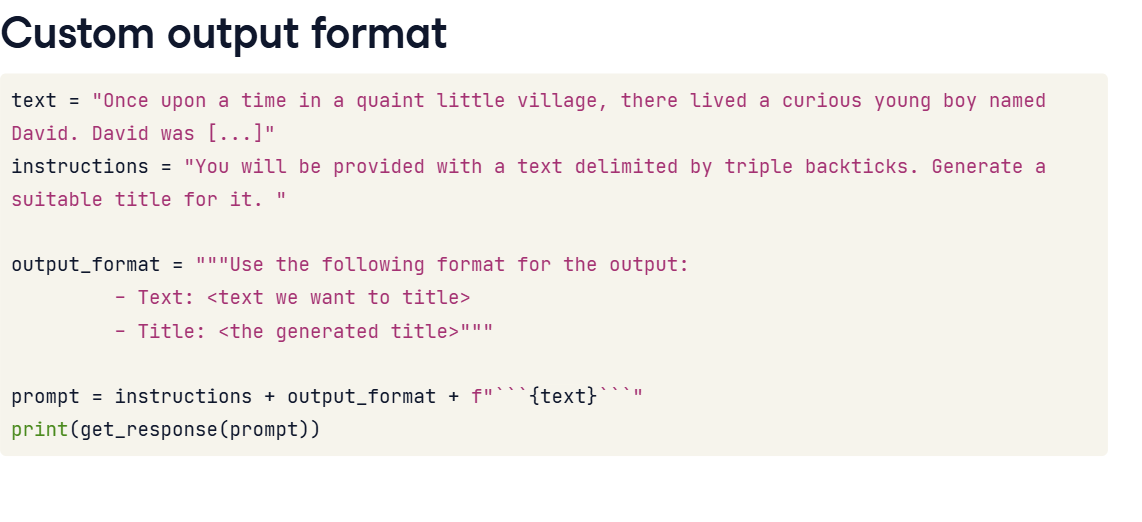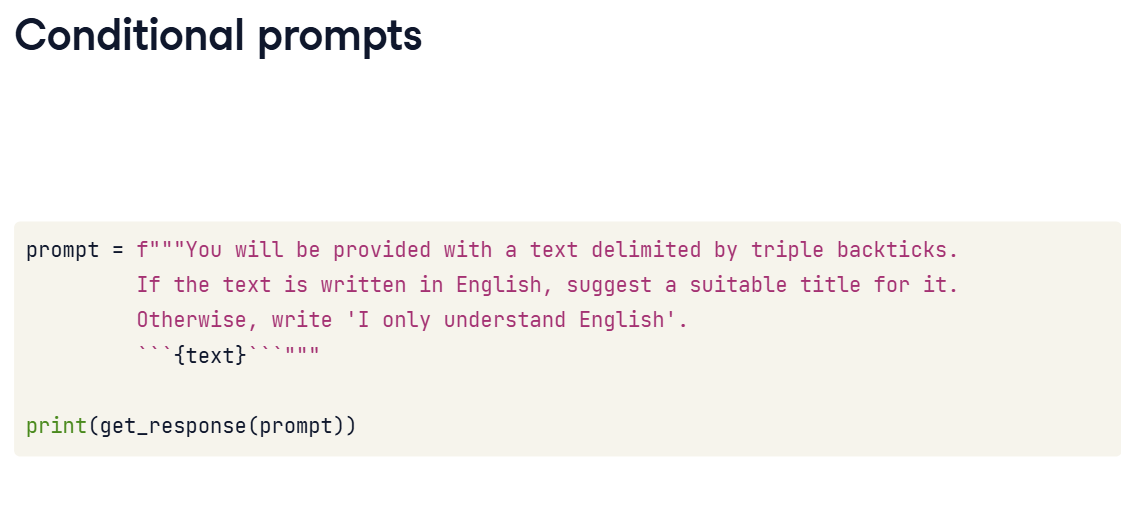
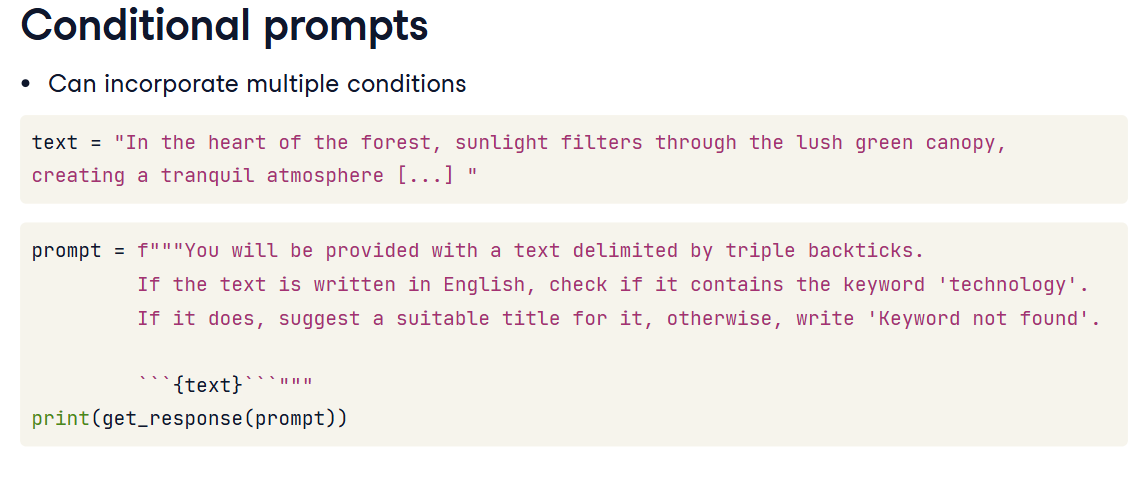

In [31]:
prompt = "Generate a table containing 10 books that I should read if I am a science fiction lover with columns for Title, Author and Year."

# Get the response
response = get_response(prompt)
print(response)

Here's a table of 10 must-read science fiction books:

| Title                          | Author                | Year  |
|--------------------------------|----------------------|-------|
| Dune                           | Frank Herbert         | 1965  |
| Neuromancer                    | William Gibson        | 1984  |
| The Left Hand of Darkness      | Ursula K. Le Guin    | 1969  |
| Foundation                     | Isaac Asimov         | 1951  |
| Snow Crash                     | Neal Stephenson      | 1992  |
| Hyperion                       | Dan Simmons          | 1989  |
| The Dispossessed               | Ursula K. Le Guin    | 1974  |
| Ender's Game                   | Orson Scott Card     | 1985  |
| The Martian                   | Andy Weir            | 2011  |
| The Three-Body Problem         | Liu Cixin            | 2008  |

These books represent a range of themes and styles within the science fiction genre, making them essential reads for any fan.


In [32]:
text = """
The sun was setting behind the mountains, casting a warm golden glow across the landscape. Birds were chirping happily, 
and a gentle breeze rustled the leaves of the trees. It was a perfect evening for a leisurely stroll in the park
"""

# Create the instructions
instructions = """
Determine the language and generate a suitable title for the text excerpt that will be 
provided using triple backticks
"""

# Create the output format
output_format = """
Use the following format for the output:
- Text: <text we want to title>
- Language: <the language of the text>
- Title: <the generated title>
"""

# Create the final prompt
prompt = instructions + output_format + f"```{text}```"
response = get_response(prompt)
print(response)

- Text: The sun was setting behind the mountains, casting a warm golden glow across the landscape. Birds were chirping happily, and a gentle breeze rustled the leaves of the trees. It was a perfect evening for a leisurely stroll in the park
- Language: English
- Title: A Serene Evening in Nature


In [33]:
text = "The sun was setting behind the mountains, casting a warm golden glow across the landscape."

# Create the instructions
instructions = """
Determine the language and number of sentences of the text excerpt that will be 
provided using triple backticks. If the text contains more than one sentence, generate 
a suitable title for the text otherwise, write 'N/A' for the title
"""

# Create the output format
output_format = """
Use the following format for the output:
- Text: <text we want to title>
- Language: <the language of the text>
- Title: <the generated title>
"""

prompt = instructions + output_format + f"```{text}```"
response = get_response(prompt)
print(response)

- Text: The sun was setting behind the mountains, casting a warm golden glow across the landscape.
- Language: English
- Title: N/A
